# Preprocessing Spain's Energy Data for Time Series Modeling

## Prepare Notebook

**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set Notebook Preferences**

In [2]:
#Set Pandas preferenes
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#Set style for matplotlib and fontdict for plots
plt.style.use('seaborn-dark')
title_dict= {'fontsize':18,
            'style': 'italic',
            'fontweight': 'semibold'}

label_dict= {'fontsize':14,
             'fontweight': 'semibold'}

#Surpress annoying warnings
warnings.filterwarnings('ignore')

#Set path to save visualizations created in this notebook
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\02_Data_Processing'

#Set path to read in visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'

#Read in file
df = pd.read_csv(path + '/2020_0620_Weather_Energy.csv', index_col=0)

**Preview Data**

In [4]:
print('Data shape:',df.shape)
display(df.head())

Data shape: (35070, 17)


,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,price_actual,temp,total_load_actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


## Feature Selection

Dropping features w/o a strong correlation to target

**Correlation Matrix**

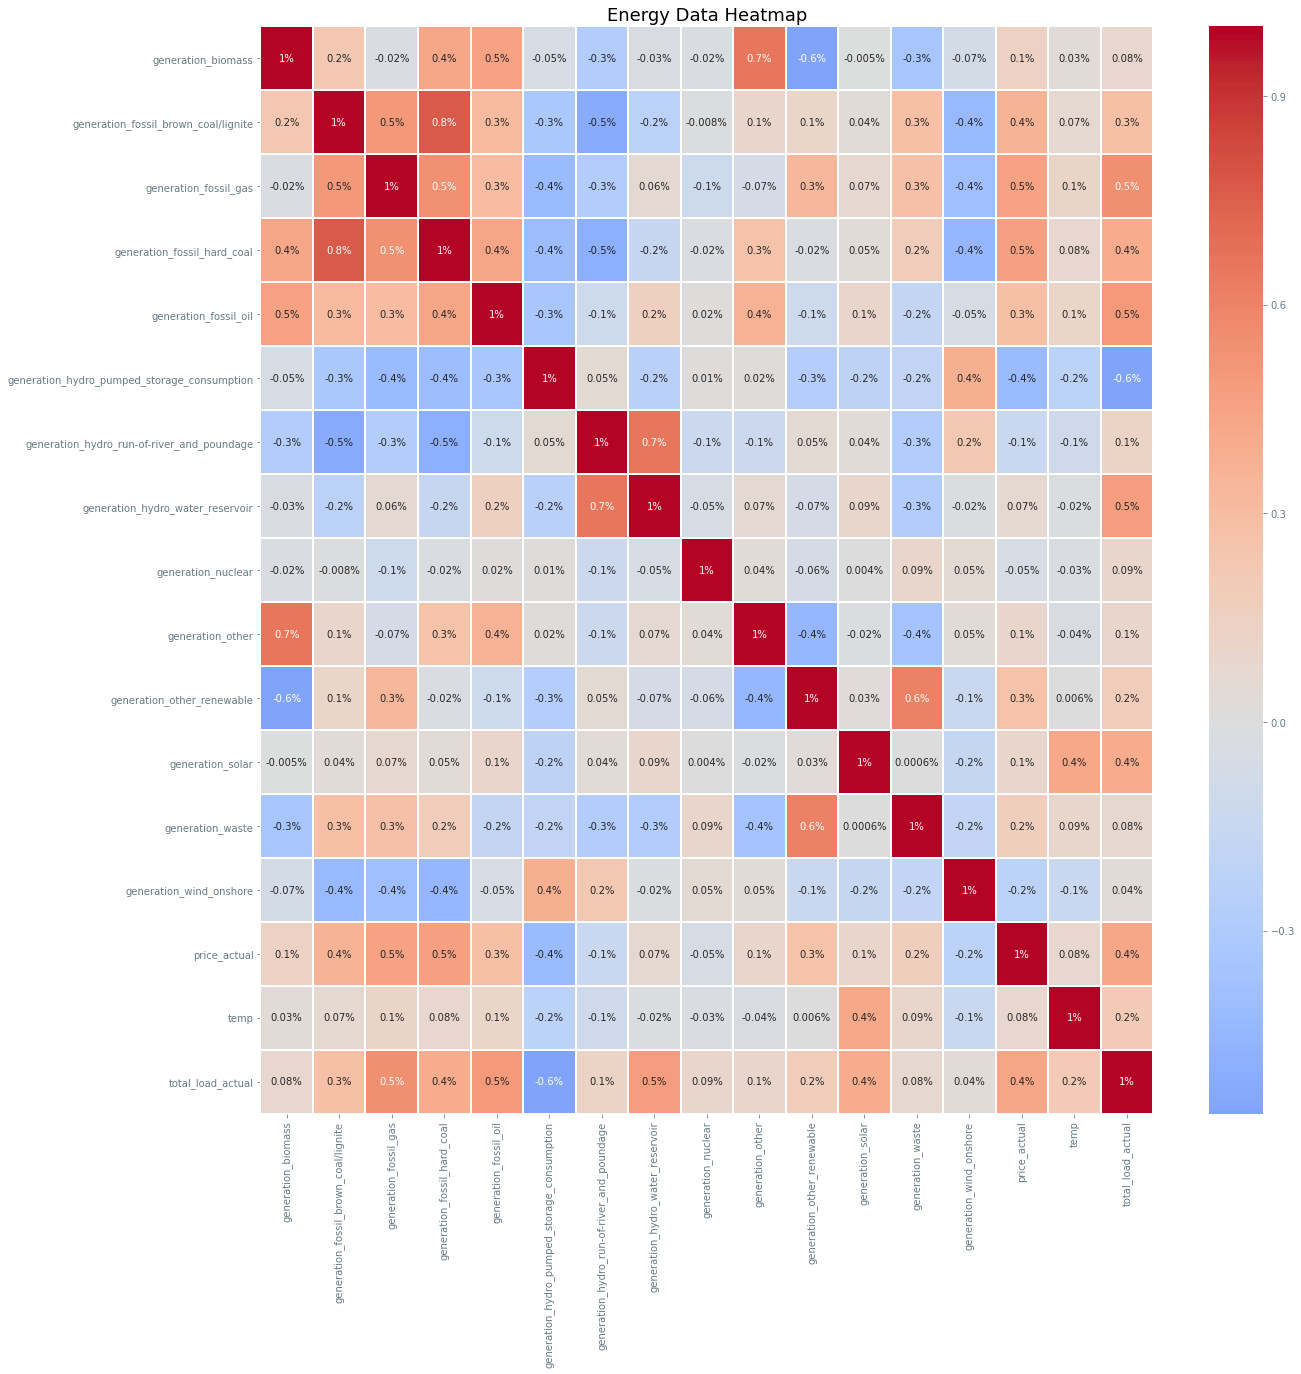

In [5]:
#Read in correlation matrix from EDA
Image(filename= eda_path + '/Correlation_Matrix.png', height=1300, width=1300)

**Dropping cols with <.4 and >-.4 correlation with target**

In [6]:
#Create corr
corr = df.corr()

#Capture features with a strong corr w/ target
features = corr['price_actual'][(corr['price_actual'] < -.4 )| (corr['price_actual'] > .4 )].index
df = df[features]

#Check
df.head()

,generation_fossil_gas,generation_fossil_hard_coal,generation_hydro_pumped_storage_consumption,price_actual,total_load_actual
date_time,,,,,
2015-01-01 00:00:00,4844.0,4821.0,863.0,65.41,25385.0
2015-01-01 01:00:00,5196.0,4755.0,920.0,64.92,24382.0
2015-01-01 02:00:00,4857.0,4581.0,1164.0,64.48,22734.0
2015-01-01 03:00:00,4314.0,4131.0,1503.0,59.32,21286.0
2015-01-01 04:00:00,4130.0,3840.0,1826.0,56.04,20264.0


## Data Preparation for Mulitvariate Analysis

### Multivariate Analysis Tests

**Granger's Test of Causality**

In [7]:
#Import Granger's test
from Time_Series_Tests import grangers_causation_matrix

#Fit to data(excluding additiona features pertaining to price_actual)
grangers_causation_matrix(df,variables=df.columns)

,generation_fossil_gas_x,generation_fossil_hard_coal_x,generation_hydro_pumped_storage_consumption_x,price_actual_x,total_load_actual_x
generation_fossil_gas_y,1.0,0.0,0.0,0.0,0.0
generation_fossil_hard_coal_y,0.0,1.0,0.0,0.0,0.0
generation_hydro_pumped_storage_consumption_y,0.0,0.0,1.0,0.0,0.0
price_actual_y,0.0,0.0,0.0,1.0,0.0
total_load_actual_y,0.0,0.0,0.0,0.0,1.0


**Cointegration Test**

In [8]:
#Import cointegration test
from Time_Series_Tests import cointegration_test

#Fit to data(excluding additiona features pertaining to price_actual)
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
generation_fossil_gas ::  4449.25   > 60.0627   =>   True
generation_fossil_hard_coal ::  1846.85   > 40.1749   =>   True
generation_hydro_pumped_storage_consumption ::  877.82    > 24.2761   =>   True
price_actual ::  322.5     > 12.3212   =>   True
total_load_actual ::  12.57     > 4.1296    =>   True


### Make Data Stationary

In [9]:
#Read in libraries
from statsmodels.tsa.seasonal import seasonal_decompose

#Write for loop that fits decomposition model to each feature
for col in df.columns:
    result = seasonal_decompose(df[col], model = 'add', freq=24)
    #Make target stationary by subtracting seasonality and trend components from feature
    df[col + '_stationary'] = df[col] - result.seasonal - result.trend
    if col == 'price_actual':
        df['price_actual_trend'] = result.trend
        df['price_actual_season'] = result.seasonal

#Sort df alphabetically and drop na   
df = df.reindex(sorted(df.columns), axis =1)
df.dropna(inplace = True, axis = 0)

#Check
display(df.head())

,generation_fossil_gas,generation_fossil_gas_stationary,generation_fossil_hard_coal,generation_fossil_hard_coal_stationary,generation_hydro_pumped_storage_consumption,generation_hydro_pumped_storage_consumption_stationary,price_actual,price_actual_season,price_actual_stationary,price_actual_trend,total_load_actual,total_load_actual_stationary
date_time,,,,,,,,,,,,
2015-01-01 12:00:00,3784.0,-821.652818,4220.0,-134.521023,972.0,131.336181,60.12,3.750959,-5.750750,62.119792,24133.0,-2151.597351
2015-01-01 13:00:00,3754.0,-788.106788,4404.0,159.169985,922.0,81.075629,62.05,3.292118,-3.198368,61.956250,24713.0,-2121.835430
2015-01-01 14:00:00,3779.0,-633.241441,4256.0,159.104975,941.0,30.936512,62.06,2.675646,-2.233563,61.617917,24672.0,-2332.248460
2015-01-01 15:00:00,3708.0,-568.192702,4038.0,101.672295,1069.0,50.314849,59.76,1.874951,-3.437243,61.322292,23528.0,-3348.148129
2015-01-01 16:00:00,3813.0,-363.724387,4191.0,415.279699,970.0,-168.099337,61.18,1.011884,-1.000426,61.168542,23118.0,-3455.914328


### Test for Stationarity

**ADF and KPSS Test**

In [10]:
#Read in ADF and KPSS tests
from Time_Series_Tests import ADF_KPSS_test

#Apply tests to each stationary featuire in df
for col in df.filter(regex = 'stationary').columns:
    print('Results for {}\n'.format(str.title(col)))
    ADF_KPSS_test(df[col],0)

Results for Generation_Fossil_Gas_Stationary

ADF Statistic: -42.97157575204435
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0008694208619115929
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739

Results for Generation_Fossil_Hard_Coal_Stationary

ADF Statistic: -42.46511619235939
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0009941876691073447
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739

Results for Generation_Hydro_Pumped_Storage_Consumption_Stationary

ADF Statistic: -45.26546840513934
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0011217945273589555
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.4

## Data Preparation for Univariate Analysis

**Target Investigation**

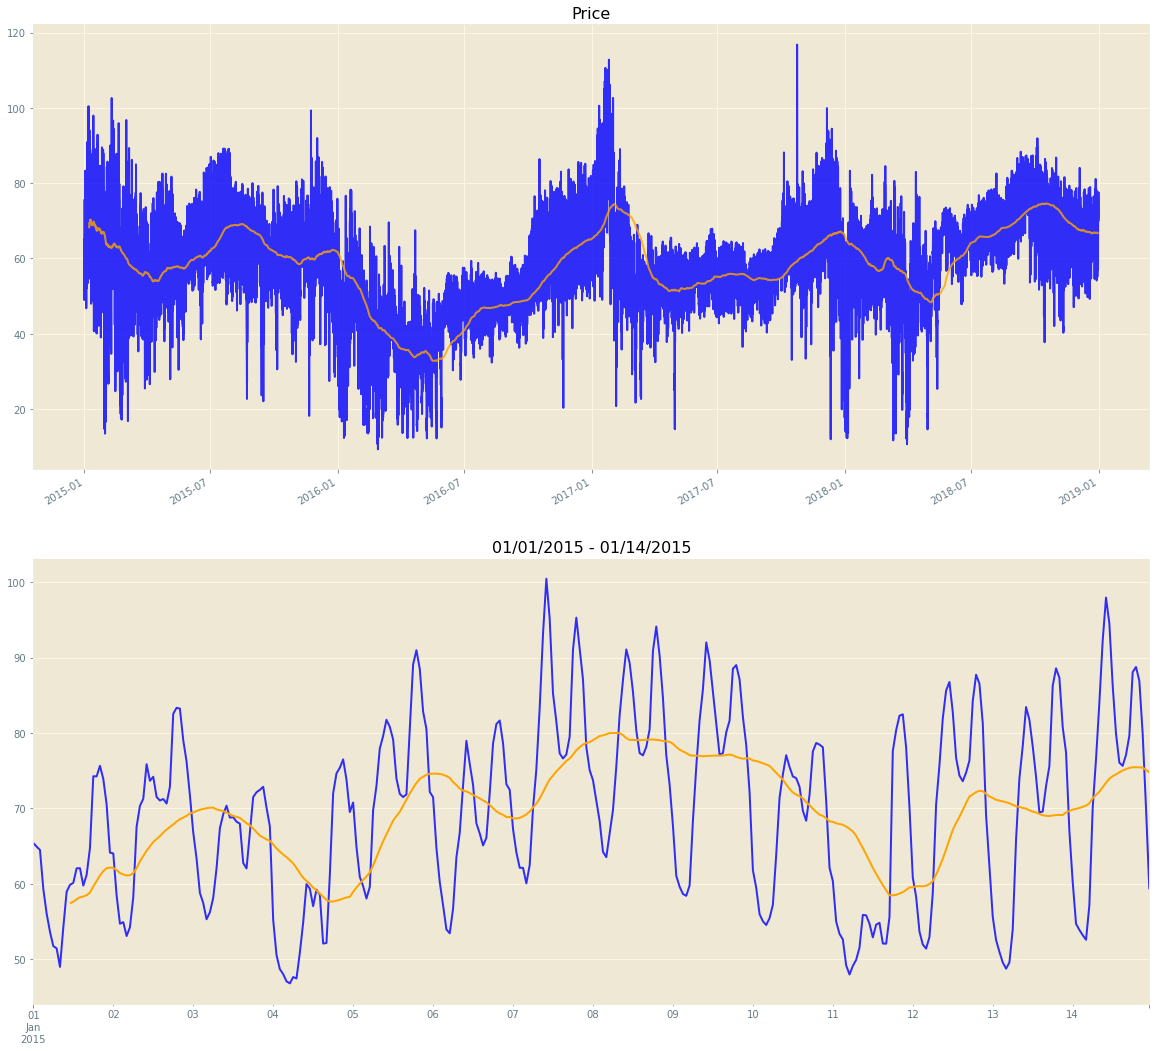

In [11]:
Image(filename= eda_path + '/Target_Plot.png', height=1300, width=1500)

**ARMA Parameters**

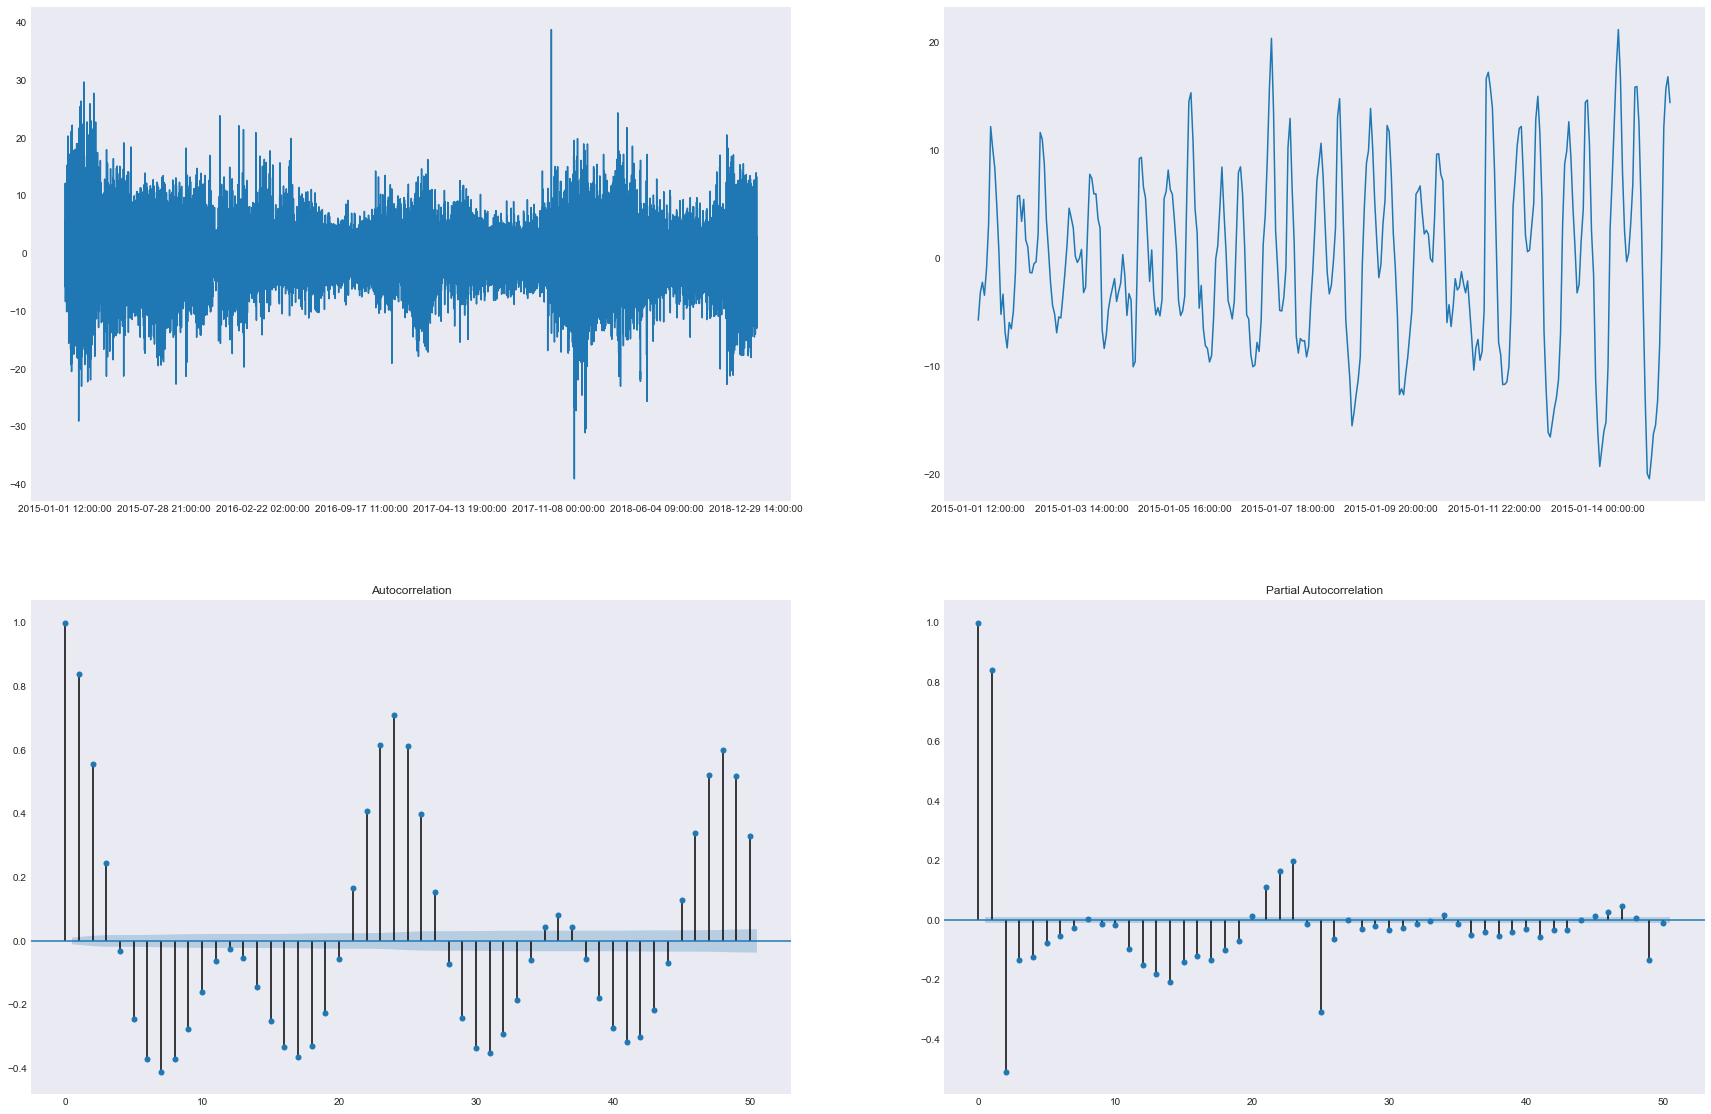

In [12]:
#Read in libraries
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from TimeseriesPlotter import timeseries_plot

#Create plot
f, ax  = plt.subplots(2,2,figsize=(30,20))

#Plot Raw stattionary data and Stationary Data with zoom
timeseries_plot(df['price_actual_stationary'], ax = ax[0,0])
timeseries_plot(df['price_actual_stationary'][:24*14], ax = ax[0,1])

#Plot PACF and ACF
plot_acf(df['price_actual_stationary'], ax = ax[1,0], lags = 50)
plot_pacf(df['price_actual_stationary'], ax = ax[1,1], lags = 50);

#Export plot
plt.savefig(viz_path + '/stationary_target_PACF_ACF.png',bbox_inches='tight')

## Feature Engineering for XGBRegressor

**Extract time features from date_time**

In [13]:
#Split date_time to extract date and time data
df.reset_index(inplace = True)
df[['date','time']] = df.date_time.str.split(' ', expand = True)
df.date =pd.to_datetime(df.date)

###Extract features from date###
df['year']=df.date.dt.year
df['month']=df.date.dt.month_name()
df['weekday']=df.date.dt.day_name()
df['hour']=df.time
df['is_weekend']= df['weekday'].apply(lambda x: True if (x == 'Saturday')|( x=='Sunday') else False)

#Add holiday flag
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start = df['date'].min(), end=df['date'].max())
df['holiday'] = df['date'].isin(holidays)

###Add lag features##
lags = np.arange(1, 25)
for i in lags:
    df['price_actual_lag_{}'.format(str(i))] = df['price_actual_stationary'].shift(i)

#Set data_time as index again
df.set_index('date_time', inplace=True)

#Drop extra cols
df.drop(['date', 'time'],axis=1, inplace=True)

**Target encode year, month, weekday, hour features**

In [14]:
#Set cols that need encoding 
cols = ['year', 'month', 'weekday', 'hour']

#Create empty dict to store mean values for cols to later encode by in groupby
encoded_cols = {}
for col in cols:
    encoded_cols[col] =(dict(df.groupby(col)['price_actual_stationary'].mean()))



#Run a loop that appends encoded values to df
for k,v in encoded_cols.items():
    df[k + '_encoded'] = df[k].map(v)

#Drop cols
df.drop(cols, axis = 1, inplace = True)

#Check
display(df.head())

,generation_fossil_gas,generation_fossil_gas_stationary,generation_fossil_hard_coal,generation_fossil_hard_coal_stationary,generation_hydro_pumped_storage_consumption,generation_hydro_pumped_storage_consumption_stationary,price_actual,price_actual_season,price_actual_stationary,price_actual_trend,total_load_actual,total_load_actual_stationary,is_weekend,holiday,price_actual_lag_1,price_actual_lag_2,price_actual_lag_3,price_actual_lag_4,price_actual_lag_5,price_actual_lag_6,price_actual_lag_7,price_actual_lag_8,price_actual_lag_9,price_actual_lag_10,price_actual_lag_11,price_actual_lag_12,price_actual_lag_13,price_actual_lag_14,price_actual_lag_15,price_actual_lag_16,price_actual_lag_17,price_actual_lag_18,price_actual_lag_19,price_actual_lag_20,price_actual_lag_21,price_actual_lag_22,price_actual_lag_23,price_actual_lag_24,year_encoded,month_encoded,weekday_encoded,hour_encoded
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,3784.0,-821.652818,4220.0,-134.521023,972.0,131.336181,60.12,3.750959,-5.750750,62.119792,24133.0,-2151.597351,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,1.173354
2015-01-01 13:00:00,3754.0,-788.106788,4404.0,159.169985,922.0,81.075629,62.05,3.292118,-3.198368,61.956250,24713.0,-2121.835430,False,True,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,1.005509
2015-01-01 14:00:00,3779.0,-633.241441,4256.0,159.104975,941.0,30.936512,62.06,2.675646,-2.233563,61.617917,24672.0,-2332.248460,False,True,-3.198368,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-0.006046
2015-01-01 15:00:00,3708.0,-568.192702,4038.0,101.672295,1069.0,50.314849,59.76,1.874951,-3.437243,61.322292,23528.0,-3348.148129,False,True,-2.233563,-3.198368,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-1.853876
2015-01-01 16:00:00,3813.0,-363.724387,4191.0,415.279699,970.0,-168.099337,61.18,1.011884,-1.000426,61.168542,23118.0,-3455.914328,False,True,-3.437243,-2.233563,-3.198368,-5.75075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-2.547201


## Split data into training and test sets

In [15]:
#Print final shape of df and display
print('Final shape of processed data:', df.shape)
display(df.head())

Final shape of processed data: (35046, 42)


,generation_fossil_gas,generation_fossil_gas_stationary,generation_fossil_hard_coal,generation_fossil_hard_coal_stationary,generation_hydro_pumped_storage_consumption,generation_hydro_pumped_storage_consumption_stationary,price_actual,price_actual_season,price_actual_stationary,price_actual_trend,total_load_actual,total_load_actual_stationary,is_weekend,holiday,price_actual_lag_1,price_actual_lag_2,price_actual_lag_3,price_actual_lag_4,price_actual_lag_5,price_actual_lag_6,price_actual_lag_7,price_actual_lag_8,price_actual_lag_9,price_actual_lag_10,price_actual_lag_11,price_actual_lag_12,price_actual_lag_13,price_actual_lag_14,price_actual_lag_15,price_actual_lag_16,price_actual_lag_17,price_actual_lag_18,price_actual_lag_19,price_actual_lag_20,price_actual_lag_21,price_actual_lag_22,price_actual_lag_23,price_actual_lag_24,year_encoded,month_encoded,weekday_encoded,hour_encoded
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,3784.0,-821.652818,4220.0,-134.521023,972.0,131.336181,60.12,3.750959,-5.750750,62.119792,24133.0,-2151.597351,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,1.173354
2015-01-01 13:00:00,3754.0,-788.106788,4404.0,159.169985,922.0,81.075629,62.05,3.292118,-3.198368,61.956250,24713.0,-2121.835430,False,True,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,1.005509
2015-01-01 14:00:00,3779.0,-633.241441,4256.0,159.104975,941.0,30.936512,62.06,2.675646,-2.233563,61.617917,24672.0,-2332.248460,False,True,-3.198368,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-0.006046
2015-01-01 15:00:00,3708.0,-568.192702,4038.0,101.672295,1069.0,50.314849,59.76,1.874951,-3.437243,61.322292,23528.0,-3348.148129,False,True,-2.233563,-3.198368,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-1.853876
2015-01-01 16:00:00,3813.0,-363.724387,4191.0,415.279699,970.0,-168.099337,61.18,1.011884,-1.000426,61.168542,23118.0,-3455.914328,False,True,-3.437243,-2.233563,-3.198368,-5.75075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-2.547201


In [16]:
#Set cutoff to split data 85% train and 15% test
cutoff = round(len(df) *.85)

#Split data
train = df[:cutoff]
test = df[cutoff:]

#Check
print('Training data shape{} Test data shape: {}'.format(train.shape,test.shape))

Training data shape(29789, 42) Test data shape: (5257, 42)


# Export Data

In [17]:
#Set path location to write file
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Write df
train.to_csv(path + '/2020_0624_Training_Data.csv')
test.to_csv(path + '/2020_0624_Test_Data.csv')